## What is does

Typical evaluation tools for binary models and data transformation for event series.

## Install package

In [1]:
%%capture
!pip3 install git+git://github.com/gabriela-plantie/evaluation_tools
    

In [2]:
from evaluation_tools import prediccion as pre

## Required packages

## Create example data prediction

In [3]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy.stats import ks_2samp

In [4]:
size=10000
ds= pd.date_range('2019-01-01', periods=30, freq='M')
d = np.random.choice(ds, size, replace=True)
x1=np.random.uniform(0,1,size)
x2=np.random.uniform(0,1,size)
x3=np.random.uniform(0,1,size)
x4=np.random.uniform(0,1,size)/5

z = 1 + 2*x1 -4* x2 + 2*x2*x3 + x4
pr = 1/(1+np.exp(-z))
#l=list(pr[(pr>0.94) & ((pr<0.95))])
#l.sort()
#l

#pr[pr>0.95]=1
ide = np.arange(0, size,1)
y=sc.stats.binom.rvs(1, pr, size=size)
df = pd.DataFrame(data={'ide':ide, 'y':y, 'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4, 'pr':pr, 'date': d})

#set(df.date)

In [5]:
min(df.pr)

0.060002507311636755

## Apply tools

In [6]:
p=pre.Predictor(df, 'ide', 'pr', 'y', 'date')
p.performance_table(q_group=[100,300])

mean: 0.6234
events: 6234


(                  ide    y  y_rate  pc_pob  pc_y  lift
 pr_cut                                                
 (-0.001, 0.298]  1000  214   0.214    0.10  0.03   0.3
 (0.298, 0.414]   1000  375   0.375    0.10  0.06   0.6
 (0.414, 0.507]   1000  472   0.472    0.10  0.08   0.8
 (0.507, 0.59]    1000  569   0.569    0.10  0.09   0.9
 (0.59, 0.661]    1000  578   0.578    0.10  0.09   0.9
 (0.661, 0.723]   1000  686   0.686    0.10  0.11   1.1
 (0.723, 0.778]   1000  746   0.746    0.10  0.12   1.2
 (0.778, 0.831]   1000  814   0.814    0.10  0.13   1.3
 (0.831, 0.884]   1000  858   0.858    0.10  0.14   1.4
 (0.884, 0.92]     600  548   0.913    0.06  0.09   1.5
 (0.92, 0.942]     300  282   0.940    0.03  0.05   1.5
 (0.942, 1.0]      100   92   0.920    0.01  0.01   1.5,
           cum_ide  precision_y  recall_y  f1_y  lift_y
 > cut                                                 
 0.000000    10000         0.62      1.00  0.77     1.0
 0.297841     9000         0.67      0.97  0.79

KstestResult(statistic=0.3946487926777095, pvalue=0.014741898398902609)
mean: 0.6234
events: 6234


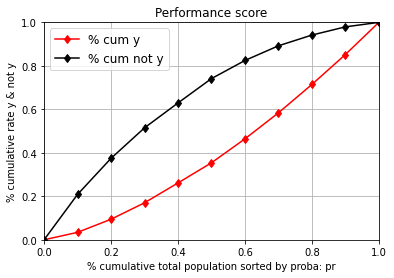

In [7]:
p.graph_ks()

mean: 0.6234
events: 6234


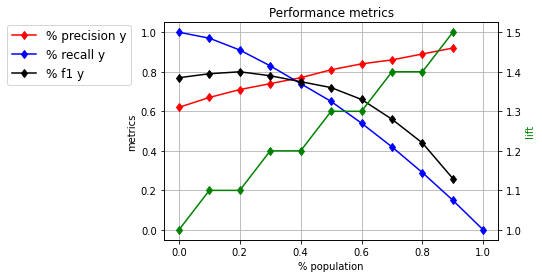

In [8]:
p.graph_others()

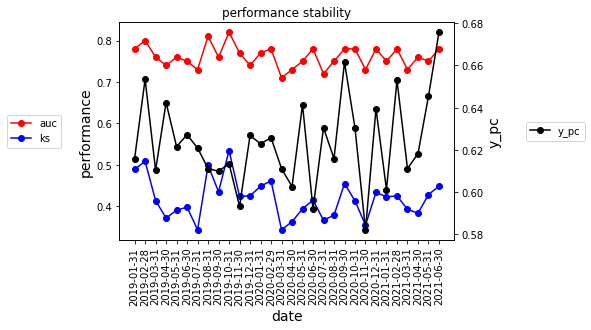

In [9]:
p.stability()
p.graph_stability()

In [10]:
p.metricas_performance()

{'auc': 0.76, 'ks': 0.3946, 'y_pc': 0.6234}

## Create example data events


In [11]:

def f_to_dt(fecha_hora_min):
    return pd.to_datetime(fecha_hora_min, format='%Y-%m-%d %H:%M')
df= pd.DataFrame()
df['ide_instalacion']=[11,11,11,11,11,11,22,22,22,22]
cli=['2019-08-01 15:30', '2019-08-01 15:40', '2019-08-01 16:30', '2019-08-01 16:31','2019-08-01 20:30','2019-08-01 21:00']
cli2=[ '2019-08-01 15:00', '2019-08-02 10:30', '2019-08-02 15:30', '2019-08-03 15:30']
cli.extend(cli2)
df['fecha']= list(map(f_to_dt, cli))
df['evento']=['A', np.nan, 'D', 'A', 'D', np.nan,'A', 'D', 'D',  'A']
display(df)

,ide_instalacion,fecha,evento
0,11,2019-08-01 15:30:00,A
1,11,2019-08-01 15:40:00,NaN
2,11,2019-08-01 16:30:00,D
3,11,2019-08-01 16:31:00,A
4,11,2019-08-01 20:30:00,D
5,11,2019-08-01 21:00:00,NaN
6,22,2019-08-01 15:00:00,A
7,22,2019-08-02 10:30:00,D
8,22,2019-08-02 15:30:00,D
9,22,2019-08-03 15:30:00,A


## Apply tools
    

,evento_15min,ide_instalacion,evento
195,2019-08-01 15:00:00,22,A
196,2019-08-01 15:15:00,22,A
197,2019-08-01 15:30:00,22,A
198,2019-08-01 15:45:00,22,A
199,2019-08-01 16:00:00,22,A


,evento_15min,ide_instalacion,evento
385,2019-08-03 14:30:00,22,D
386,2019-08-03 14:45:00,22,D
387,2019-08-03 15:00:00,22,D
388,2019-08-03 15:15:00,22,D
389,2019-08-03 15:30:00,22,A


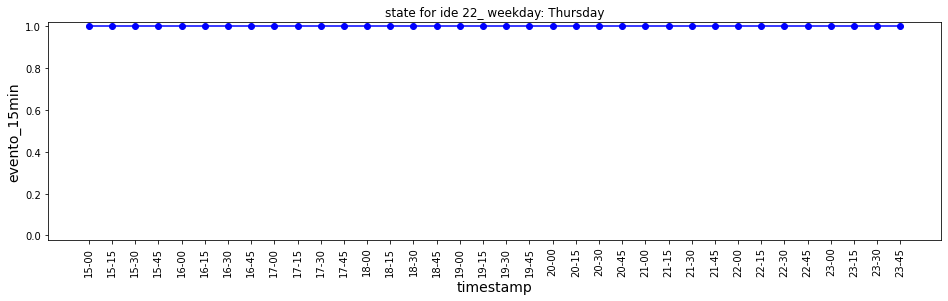

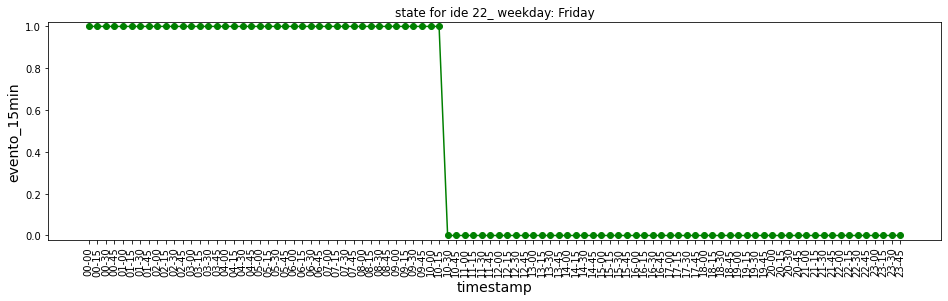

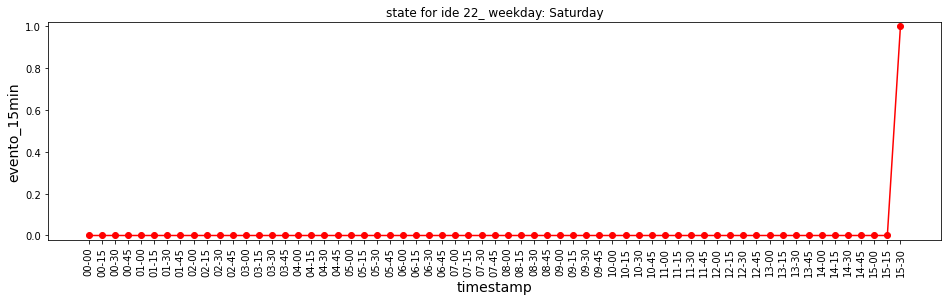

In [12]:

e = pre.Events(df, grouper='ide_instalacion',  datetime_name='fecha', event_name='evento', every_x_minutes=15)

ide=22
display(e.df[e.df.ide_instalacion==ide][:5])
display(e.df[e.df.ide_instalacion==ide][-5:])
a = e.plot_ide(ide_value=ide, event_value_pos='A', figsize=(16,4))


,evento_15min,ide_instalacion,evento
2,2019-08-01 15:30:00,11,A
3,2019-08-01 15:45:00,11,A
4,2019-08-01 16:00:00,11,A
5,2019-08-01 16:15:00,11,A
6,2019-08-01 16:30:00,11,A


,evento_15min,ide_instalacion,evento
190,2019-08-03 14:30:00,11,D
191,2019-08-03 14:45:00,11,D
192,2019-08-03 15:00:00,11,D
193,2019-08-03 15:15:00,11,D
194,2019-08-03 15:30:00,11,D


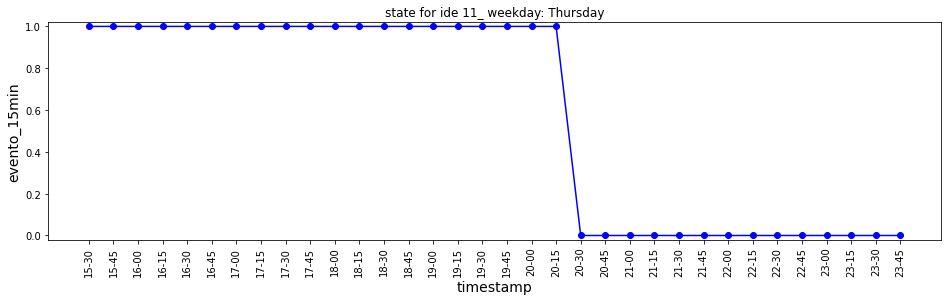

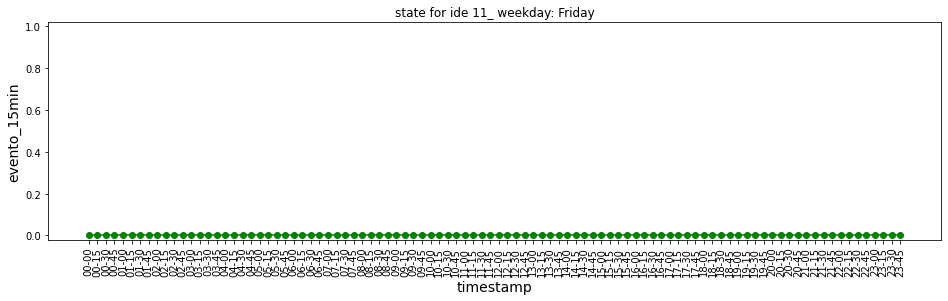

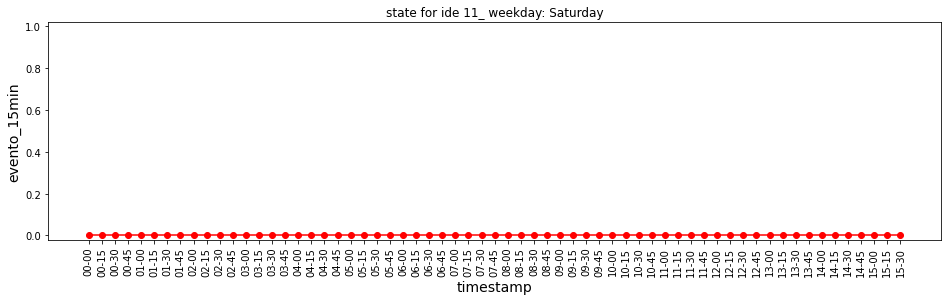

In [13]:
ide=11
display(e.df[e.df.ide_instalacion==ide][:5])
display(e.df[e.df.ide_instalacion==ide][-5:])
a = e.plot_ide(ide_value=ide, event_value_pos='A', figsize=(16,4))


In [17]:
#!jupyter nbconvert README.ipynb --to markdown